In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import load

import CustomFunctions

In [2]:
model = load('models/gradient_boosting.joblib')

In [3]:
df = pd.read_csv('data/test.csv')

In [4]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [5]:
# fill missing values
df = CustomFunctions.impute_missing(df)

In [6]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [12]:
columns_to_include = [
    'employee_id', 'department', 'region', 'education', 'gender',
    'recruitment_channel', 'no_of_trainings', 'previous_year_rating', 'length_of_service',
    'KPIs_met >80%', 'awards_won?',
    'age', 'avg_training_score'   
    ]

df_features = df[columns_to_include]
df_features

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,age,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,0.0,1,1,0,24,77
1,74430,HR,region_4,Bachelor's,f,other,1,3.0,5,0,0,31,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,1.0,4,0,0,31,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,2.0,9,0,0,31,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,4.0,7,0,0,30,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,3.0,1,0,0,24,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,3.0,7,0,0,31,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,4.0,4,0,0,26,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,0.0,1,0,0,27,70


In [15]:
X = pd.get_dummies(df_features.drop('employee_id', axis=1))

In [16]:
X

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,age,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,0.0,1,1,0,24,77,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,3.0,5,0,0,31,51,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,1,1.0,4,0,0,31,47,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,3,2.0,9,0,0,31,65,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,1,4.0,7,0,0,30,61,0,1,0,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,3.0,1,0,0,24,61,0,0,0,...,0,0,0,1,0,0,1,0,0,1
23486,1,3.0,7,0,0,31,74,0,0,0,...,0,0,1,0,0,0,1,0,0,1
23487,1,4.0,4,0,0,26,50,0,0,1,...,0,0,1,0,0,1,0,0,0,1
23488,3,0.0,1,0,0,27,70,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [17]:
df['is_promoted'] = model.predict(X)

In [18]:
df_submit = df[['employee_id', 'is_promoted']]

In [19]:
df_submit.to_csv('submissions/submit_2.csv', index=False)

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

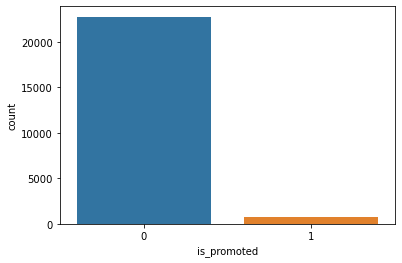

In [20]:
sns.countplot(data=df, x='is_promoted')